# Data Analysis

## Primeras aproximaciones de análisis

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración Jupyter
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Cargamos el dataframe ya limpio desde el análisis de Features
data_ana_corona = pd.read_csv("data_ana_coronaperiod.csv", sep = ',', parse_dates=['release_date_year'])
data_ana_corona = data_ana_corona.drop(columns=['Unnamed: 0'])

print('Tamaño inicial: ',data_ana_corona.shape)
data_ana_corona.sample(2)

Tamaño inicial:  (1581, 37)


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
1506,Aprovéchame,Andy Rivera,17006,2017-04-15,4pkCB8ZslWoCF0xoKqNRqp,2017,467479,Aprovéchame,2017-03-21,0.295121,0.42,0.24000,0.794,0.746,0.000161,0.0637,0.858864,0.127099,0.739,0.772267,4,2017-01-01,latin,latin hip hop,reggaeton,reggaeton colombiano,reggaeton flow,trap latino,tropical,NaN,NaN,NaN,"latin,latin hip hop,reggaeton,reggaeton colomb...",7hIqJfRYGBWWT1Qxu6Cpd2,1467248,0.707071,0.001104
224,Blinding Lights,The Weeknd,157667,2020-03-20,0kPmcPPkjoyfLhUwHLWrk0,2020,157667,After Hours,2020-03-20,0.322613,0.50,0.00146,0.515,0.731,0.000096,0.0897,0.824294,0.052113,0.336,0.725311,4,2020-01-01,canadian contemporary r&b,canadian pop,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"canadian contemporary r&b,canadian pop,pop",1Xyo4u8uXC1ZmMpatF05PJ,23815435,0.959596,0.000141


# Oldies analysis

# Pregunta 3: ¿Se han vuelto a reescuchar más canciones antiguas entre diferentes años?

La idea de esta pregunta es saber si durante el periodo del coronavirus hemos rememorado canciones antiguas, hasta el punto de llegar al top200 y saber si es algo habitual y ocurre en otros años, o no.

Para ello vamos a usar la columna "release_date_year" que nos dice la fecha de lanzamiento de la canción. En un primer vistazo ya vemos que en el 2020 se han reescuchado más canciones antiguas que otros años. Como está un t.anto disperso, vamos a agrupar años marcando para marcar dos rangos de fechas: hasta 2014 y de 2014 a 2020. Ojo, tambié hay que tener en cuenta que los años superiores, tendrán más canciones antiguas porque cogen las de los años anteriores

In [76]:
# Vamos a crear un dataframe agrupando los datos que nos interesa y echamos un primer vistazo a ver cuantas canciones hay de cada año
data_oldies_count = data_ana_corona.groupby(['year', 'release_date_year']).count()
data_oldies_count.reset_index(inplace=True)
data_oldies_count = data_oldies_count[['year', 'release_date_year', 'Streamstotal']]
data_oldies_count

# Creamos fechas para agrupar
fecha_1 = datetime(1959, 1, 1)
fecha_2 = datetime(2014, 1, 1)
fecha_3 = datetime(2020, 1, 1)

In [49]:
data_oldies_count_1959_2014.groupby('year').sum()

,Streamstotal
year,
2017,8
2018,14
2019,6
2020,13


      Streamstotal
year              
2017             8
2018            14
2019             6
2020            13
      Streamstotal
year              
2017           379
2018           389
2019           366
2020           411


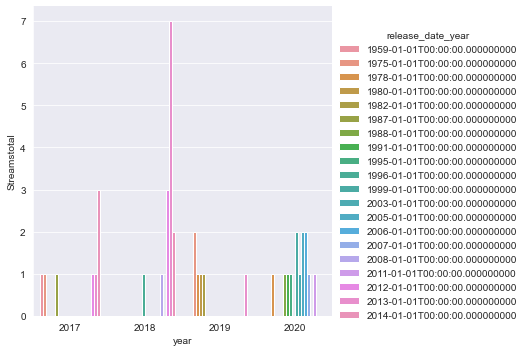

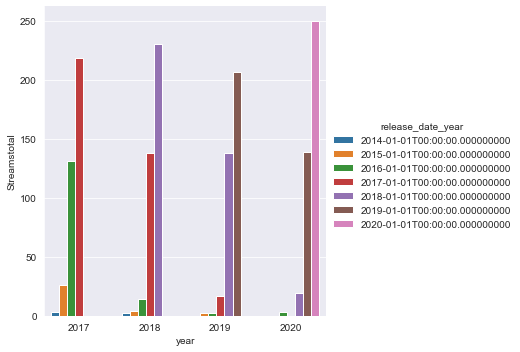

In [52]:
# Ploteamos el rango más antiguo
data_oldies_count_1959_2014 = data_oldies_count[data_oldies_count.release_date_year.between(fecha_1, fecha_2)]
sns.catplot(x='year', y='Streamstotal', hue='release_date_year', data=data_oldies_count_1959_2014, kind='bar')

data_oldies_count_2014_2020 = data_oldies_count[data_oldies_count.release_date_year.between(fecha_2, fecha_3)]
sns.catplot(x='year', y='Streamstotal', hue='release_date_year', data=data_oldies_count_2014_2020, kind='bar')

# Número de canciones anteriores a 2014 agrupadas en años
print(data_oldies_count_1959_2014.groupby('year').sum())
print(data_oldies_count_2014_2020.groupby('year').sum())

Pero ojo, estamos mirando número de canciones y no Streamstotales de las mismas, que es lo que de verdad nos interesa, ahcemos lo mismo con Stremas totales entonces

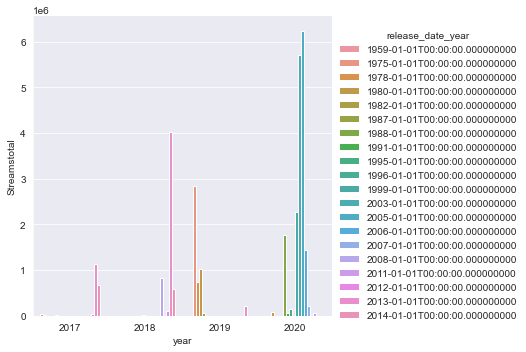

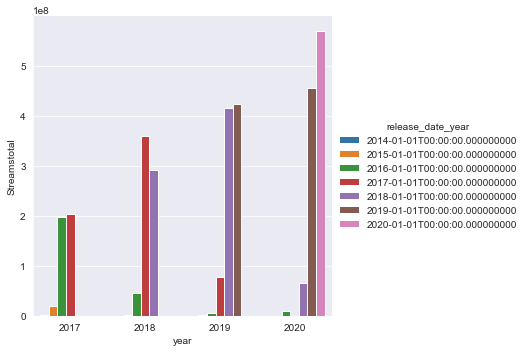

In [38]:
# Vamos a crear un dataframe agrupando los datos que nos interesa y echamos un primer vistazo
data_oldies_streams = data_ana_corona.groupby(['year', 'release_date_year']).sum()
data_oldies_streams.reset_index(inplace=True)
data_oldies_streams = data_oldies_streams[['year', 'release_date_year', 'Streamstotal']]

# Ploteamos los rangos
data_oldies_streams_1959_2014 = data_oldies_streams[data_oldies_streams.release_date_year.between(fecha_1, fecha_2)]
sns.catplot(x='year', y='Streamstotal', hue='release_date_year', data=data_oldies_streams_1959_2014, kind='bar')

data_oldies_streams_2014_2020 = data_oldies_streams[data_oldies_streams.release_date_year.between(fecha_2, fecha_3)]
sns.catplot(x='year', y='Streamstotal', hue='release_date_year', data=data_oldies_streams_2014_2020, kind='bar')

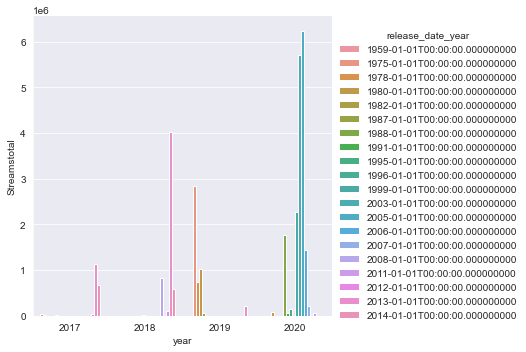

In [25]:
# Ploteamos el rango más antiguo
data_oldies_1959_2014 = data_oldies[data_oldies.release_date_year.between(fecha_1, fecha_2)]
sns.catplot(x='year', y='Streamstotal', hue='release_date_year', data=data_oldies_1959_2014, kind='bar')

In [55]:
data_oldies = data_ana_corona.groupby(['year', 'release_date_year', 'streamstotal_weights']).sum()
data_oldies

Streams  Streamstotal    length  \
year release_date_year streamstotal_weights                                    
2017 1959-01-01        0.000092                20641         38999  0.223938   
     1975-01-01        0.000036                15080         15080  0.718234   
     1987-01-01        0.000046                19621         19621  0.561570   
     2012-01-01        0.000082                17406         34703  0.417325   
     2013-01-01        0.002673                22696       1131383  0.473768   
...                                              ...           ...       ...   
2020 2020-01-01        0.013315               561102      14918019  0.196141   
                       0.013619               406642      15258677  0.227846   
                       0.014153               378009      15856333  0.329911   
                       0.015587               619574      17463083  0.214125   
                       0.017702               244655      19832873  0.566571   

                                             popularity  acousticness  \
year release_date_year streamstotal_weights                             
2017 1959-01-01        0.000092                    0.00        0.7380   
     1975-01-01        0.000036                    0.02        0.2710   
     1987-01-01        0.000046                    0.00        0.0124   
     2012-01-01        0.000082                    0.67        0.3370   
     2013-01-01        0.002673                    0.68        0.6070   
...                                                 ...           ...   
2020 2020-01-01        0.013315                    0.84        0.1930   
                       0.013619                    0.85        0.0861   
                       0.014153                    0.85        0.0217   
                       0.015587                    0.85        0.0130   
                       0.017702                    0.89        0.0103   

                                             danceability  energy  \
year release_date_year streamstotal_weights                         
2017 1959-01-01        0.000092                     0.516   0.798   
     1975-01-01        0.000036                     0.414   0.404   
     1987-01-01        0.000046                     0.359   0.543   
     2012-01-01        0.000082                     0.721   0.834   
     2013-01-01        0.002673                     0.614   0.379   
...                                                   ...     ...   
2020 2020-01-01        0.013315                     0.663   0.598   
                       0.013619                     0.685   0.848   
                       0.014153                     0.755   0.617   
                       0.015587                     0.641   0.857   
                       0.017702                     0.607   0.829   

                                             instrumentalness  liveness  \
year release_date_year streamstotal_weights                               
2017 1959-01-01        0.000092                      0.000128    0.3050   
     1975-01-01        0.000036                      0.000000    0.3000   
     1987-01-01        0.000046                      0.006810    0.2860   
     2012-01-01        0.000082                      0.000000    0.1040   
     2013-01-01        0.002673                      0.000464    0.0986   
...                                                       ...       ...   
2020 2020-01-01        0.013315                      0.000080    0.0856   
                       0.013619                      0.000007    0.0783   
                       0.014153                      0.000000    0.0625   
                       0.015587                      0.005340    0.0695   
                       0.017702                      0.000000    0.1070   

                                             loudness  speechiness  valence  \
year release_date_year streamstotal_weights                                   
2017 1959-01-01       

Hacemos un gráfico para ver canciones lanzadas en el rango 1 y se ve claramente que en el 2020 ha habido muchas más reproducciones de canciones anteriores al 2014 que los años anteriores. Aquí si podemos establecer una conclusión más clara: en la pandemia escuhamos más a los oldies, ¿por qué?

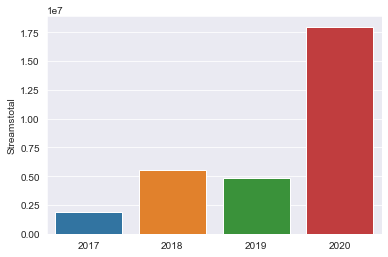

In [78]:
# Para agrupar los años antiguos y sumar sus StreamsTotales

# Creamos fechas para agrupar
fecha_1 = datetime(1959, 1, 1)
fecha_2 = datetime(2014, 1, 1)

data_oldies = data_ana_corona.groupby(['year', 'release_date_year']).sum()
data_oldies.reset_index(inplace=True)
data_oldies = data_oldies[['year', 'release_date_year', 'Streamstotal', 'streamstotal_weights']]

data_oldies_2017 = data_oldies[data_oldies['year'] == 2017]
data_oldies_2018 = data_oldies[data_oldies['year'] == 2018]
data_oldies_2019 = data_oldies[data_oldies['year'] == 2019]
data_oldies_2020 = data_oldies[data_oldies['year'] == 2020]

data_oldies_2017_rango1_totalStreams = data_oldies_2017[data_oldies_2017.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2018_rango1_totalStreams = data_oldies_2018[data_oldies_2018.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2019_rango1_totalStreams = data_oldies_2019[data_oldies_2019.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2020_rango1_totalStreams = data_oldies_2020[data_oldies_2020.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']

# Create dataframe
columns = ['Streamstotal']
index = ['2017', '2018', '2019', '2020']
data = [data_oldies_2017_rango1_totalStreams,
        data_oldies_2018_rango1_totalStreams,
        data_oldies_2019_rango1_totalStreams,
        data_oldies_2020_rango1_totalStreams]
data_oldies_rango1 = pd.DataFrame(data, index=index, columns=columns)
sns.barplot(x=index, y='Streamstotal', data=data_oldies_rango1)

Por que no me quiero quedar con dudas con el gráfico anterior, quiero ver esta misam comparación pero en otro periodo que ya tenemos preparado anteriormente. Aplicamos el código todo junto y vemos la diferencia, y es interesante ver que el total de streams es mucho mayor, ¿por qué?, ¿Puede estar relacionado con que este periodo de normalidad coge el rango de las navidades donde se hacen muchos karaokes donde evidentemente se esuchan éxitos antiguos? Pero tengo mis dudas porque el periodo normal coge del 8 de Enero al 8 de Marzo

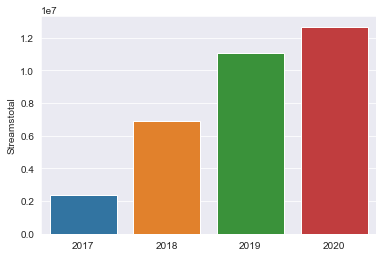

In [109]:
# Cargamos el dataframe ya limpio desde el análisis de Features
data_ana_normal = pd.read_csv("data_ana_normalperiod.csv", sep = ',', parse_dates=['release_date_year'])
data_ana_normal = data_ana_normal.drop(columns=['Unnamed: 0'])

# Creamos fechas para agrupar
fecha_1 = datetime(1959, 1, 1)
fecha_2 = datetime(2014, 1, 1)
fecha_3 = datetime(2020, 1, 1)

data_oldies = data_ana_normal.groupby(['year', 'release_date_year']).sum()
data_oldies.reset_index(inplace=True)
data_oldies = data_oldies[['year', 'release_date_year', 'Streamstotal', 'streamstotal_weights']]

data_oldies_2017 = data_oldies[data_oldies['year'] == 2017]
data_oldies_2018 = data_oldies[data_oldies['year'] == 2018]
data_oldies_2019 = data_oldies[data_oldies['year'] == 2019]
data_oldies_2020 = data_oldies[data_oldies['year'] == 2020]

data_oldies_2017_rango1_totalStreams = data_oldies_2017[data_oldies_2017.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2018_rango1_totalStreams = data_oldies_2018[data_oldies_2018.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2019_rango1_totalStreams = data_oldies_2019[data_oldies_2019.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']
data_oldies_2020_rango1_totalStreams = data_oldies_2020[data_oldies_2020.release_date_year.between(fecha_1, fecha_2)].sum()['Streamstotal']

# Create dataframe
columns = ['Streamstotal']
index = ['2017', '2018', '2019', '2020']
data = [data_oldies_2017_rango1_totalStreams,
        data_oldies_2018_rango1_totalStreams,
        data_oldies_2019_rango1_totalStreams,
        data_oldies_2020_rango1_totalStreams]
data_oldies_rango1 = pd.DataFrame(data, index=index, columns=columns)
sns.barplot(x=index, y='Streamstotal', data=data_oldies_rango1)


Si volvemos al análisis del periodo pandemia y hacemos lo mismo con canciones posteriores al 2014, vemos otro panorama, con una tendencia pero claramente está influenciada por el hecho de que años más actuales congregan los años anteriores próximos.

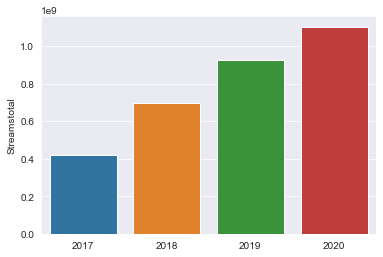

In [79]:
# Para agrupar los años antiguos y sumar sus StreamsTotales

# Creamos fechas para agrupar
fecha_2 = datetime(2014, 1, 1)
fecha_3 = datetime(2020, 1, 1)

data_oldies = data_ana_corona.groupby(['year', 'release_date_year']).sum()
data_oldies.reset_index(inplace=True)
data_oldies = data_oldies[['year', 'release_date_year', 'Streamstotal', 'streamstotal_weights']]

data_oldies_2017 = data_oldies[data_oldies['year'] == 2017]
data_oldies_2018 = data_oldies[data_oldies['year'] == 2018]
data_oldies_2019 = data_oldies[data_oldies['year'] == 2019]
data_oldies_2020 = data_oldies[data_oldies['year'] == 2020]

data_oldies_2017_rango1_totalStreams = data_oldies_2017[data_oldies_2017.release_date_year.between(fecha_2, fecha_3)].sum()['Streamstotal']
data_oldies_2018_rango1_totalStreams = data_oldies_2018[data_oldies_2018.release_date_year.between(fecha_2, fecha_3)].sum()['Streamstotal']
data_oldies_2019_rango1_totalStreams = data_oldies_2019[data_oldies_2019.release_date_year.between(fecha_2, fecha_3)].sum()['Streamstotal']
data_oldies_2020_rango1_totalStreams = data_oldies_2020[data_oldies_2020.release_date_year.between(fecha_2, fecha_3)].sum()['Streamstotal']

# Create dataframe
columns = ['Streamstotal']
index = ['2017', '2018', '2019', '2020']
data = [data_oldies_2017_rango1_totalStreams,
        data_oldies_2018_rango1_totalStreams,
        data_oldies_2019_rango1_totalStreams,
        data_oldies_2020_rango1_totalStreams]
data_oldies_rango1 = pd.DataFrame(data, index=index, columns=columns)
sns.barplot(x=index, y='Streamstotal', data=data_oldies_rango1)

In [ ]:
'''data_oldies_songs = data_ana_corona.groupby(['release_date_year','year']).count()
data_oldies_songs.reset_index(inplace=True)
data_oldies_songs[['year', 'release_date_year', 'Track Name']]'''

 Para matar nuestra curiosidad, vamos cuales son las canciones antiguas más escuchadas en cada año

En 2017, batiburrillo, pero el primero está EdSheran que sacó nuevo disco el 3 de marzo de 2017, lo que es lógico que se vuelva a escuchar alguna canción que otra antigua suya.

In [100]:
# ¿Qué canciones antiguas se han escuchado más durante la pandemia y los otros años?
data_oldies_songs = data_ana_corona[data_ana_corona.release_date_year.between(fecha_1, fecha_2)]
data_oldies_songs_2017= data_oldies_songs[data_oldies_songs['year'] == 2017]
data_oldies_songs_2017.sort_values(by=['Streamstotal'], ascending=False)

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
652,Photograph,Ed Sheeran,22696,2017-03-13,6fxVffaTuwjgEk5h9QyRjy,2017,1131383,x (Wembley Edition),2013,0.473768,0.68,0.6070,0.614,0.379,0.000464,0.0986,0.675049,0.035321,0.201,0.304287,4,2013-01-01,pop,uk pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"pop,uk pop",6eUKZXaKkcviH0Ku9w2n3V,69011627,0.929293,0.002673
1281,Bailando - Spanish Version,Enrique Iglesias,19220,2017-03-17,32lm3769IRfcnrQV11LO4E,2017,465098,SEX AND LOVE (Deluxe),2014-01-01,0.433834,0.70,0.0426,0.723,0.777,0.000004,0.0451,0.904104,0.122756,0.961,0.190892,4,2014-01-01,dance pop,latin,latin pop,mexican pop,pop,tropical,NaN,NaN,NaN,NaN,"dance pop,latin,latin pop,mexican pop,pop,trop...",7qG3b048QCHVRO5Pv1T5lw,9551884,0.818182,0.001099
1310,Propuesta Indecente,Romeo Santos,17705,2017-04-01,5PycBIeabfvX3n9ILG7Vrv,2017,121199,"Fórmula, Vol. 2 (Deluxe Edition)",2014-02-25,0.412602,0.77,0.4990,0.757,0.632,0.000000,0.0723,0.794879,0.045889,0.742,0.404153,4,2014-01-01,bachata,latin,tropical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"bachata,latin,tropical",5lwmRuXgjX8xIwlnauTZIP,11287322,0.848485,0.000286
1563,"Happy - From ""Despicable Me 2""",Pharrell Williams,16303,2017-04-11,5b88tNINg4Q4nrRbrCXUmg,2017,81165,G I R L,2014-03-03,0.406414,0.13,0.2190,0.647,0.822,0.000000,0.0908,0.866054,0.231326,0.962,0.651917,4,2014-01-01,pop,pop rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"pop,pop rap",2RdwBSPQiwcmiDo9kixcl8,3256958,0.818182,0.000192
1547,Johnny B. Goode,Chuck Berry,20641,2017-03-19,3BUQFs6aFWh7EFNmI8bfL7,2017,38999,Berry Is On Top,1959-01-01,0.223938,0.00,0.7380,0.516,0.798,0.000128,0.3050,0.722029,0.086566,0.969,0.706543,4,1959-01-01,blues rock,classic rock,rock,rock-and-roll,rockabilly,soul,NaN,NaN,NaN,NaN,"blues rock,classic rock,rock,rock-and-roll,roc...",293zczrfYafIItmnmM3coR,1198072,0.686869,0.000092
832,Tu jardín con enanitos,Melendi,17406,2017-03-14,6yCjU5j6YHbux2VQCBTTE1,2017,34703,Lágrimas desordenadas,2012-11-13,0.417325,0.67,0.3370,0.721,0.834,0.000000,0.1040,0.872784,0.016358,0.530,0.437453,4,2012-01-01,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"spanish pop,spanish pop rock",1EXjXQpDx2pROygh8zvHs4,2297700,0.747475,0.000082
1569,Red Hill Mining Town - Steve Lillywhite 2017 Mix,U2,19621,2017-04-21,4gjYDqwEWIE58qwsva3tui,2017,19621,The Joshua Tree (Super Deluxe),1987-03-03,0.561570,0.00,0.0124,0.359,0.543,0.006810,0.2860,0.703513,0.012160,0.195,0.489560,4,1987-01-01,irish rock,permanent wave,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"irish rock,permanent wave,rock",51Blml2LZPmy7TTiAg47vQ,7205398,0.818182,0.000046
1067,Bohemian Rhapsody - Remastered 2011,Queen,15080,2017-04-27,1AhDOtG9vPSOmsWgNW0BEY,2017,15080,A Night At The Opera (2011 Remaster),1975-11-21,0.718234,0.02,0.2710,0.414,0.404,0.000000,0.3000,0.693171,0.038651,0.224,0.057854,4,1975-01-01,classic rock,glam rock,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"classic rock,glam rock,rock",1dfeR4HaWDbWqFHLkxsg1d,28430675,0.898990,0.000036


En 2018, hay muchas canciones de Avicii, que tiene lógica porque se suicidó el 20 de abril de 2018

In [102]:
data_oldies_songs = data_ana_corona[data_ana_corona.release_date_year.between(fecha_1, fecha_2)]
data_oldies_songs_2018= data_oldies_songs[data_oldies_songs['year'] == 2018]
data_oldies_songs_2018.sort_values(by=['Streamstotal'], ascending=False)

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
638,Thinking out Loud,Ed Sheeran,21849,2018-03-13,1Slwb6dOYkBlWal1PGtnNg,2018,1347425,x (Wembley Edition),2013,0.531655,0.68,0.47400,0.781,0.445,0.000000,0.1840,0.820125,0.009120,0.591,0.110589,4,2013-01-01,pop,uk pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"pop,uk pop",6eUKZXaKkcviH0Ku9w2n3V,69011627,0.929293,0.001915
1226,Wake Me Up - Radio Edit,Avicii,46196,2018-04-20,6g1NlCpW7fgqDnWbCCDrHl,2018,1314313,True,2013-01-01,0.444125,0.03,0.00380,0.532,0.783,0.001200,0.1610,0.832075,0.042125,0.643,0.411797,4,2013-01-01,big room,dance pop,edm,pop,NaN,NaN,NaN,NaN,NaN,NaN,"big room,dance pop,edm,pop",1vCWHaC5f2uS3yhpwWbIA6,18069118,0.858586,0.001867
1425,I'm Yours,Jason Mraz,20665,2018-03-22,3S0OXQeoh0w6AY8WQVckRW,2018,833286,We Sing. We Dance. We Steal Things.,2008-05-01,0.430688,0.73,0.59500,0.686,0.457,0.000000,0.1050,0.745896,0.034163,0.718,0.591344,4,2008-01-01,acoustic pop,neo mellow,pop,pop rock,viral pop,NaN,NaN,NaN,NaN,NaN,"acoustic pop,neo mellow,pop,pop rock,viral pop",4phGZZrJZRo4ElhRtViYdl,5518093,0.797980,0.001184
1229,Levels - Radio Edit,Avicii,36417,2018-04-20,5B03nSG8pLE48jh7kmasuL,2018,723789,True,2013-01-01,0.327434,0.45,0.04840,0.579,0.887,0.828000,0.2940,0.823408,0.014765,0.472,0.424899,4,2013-01-01,big room,dance pop,edm,pop,NaN,NaN,NaN,NaN,NaN,NaN,"big room,dance pop,edm,pop",1vCWHaC5f2uS3yhpwWbIA6,18069118,0.858586,0.001028
1231,The Nights,Avicii,27431,2018-04-20,0ct6r3EGTcMLPtrXHDvVjc,2018,538273,The Days / Nights,2014-01-01,0.262654,0.82,0.01660,0.527,0.835,0.000000,0.2490,0.845174,0.029097,0.654,0.424511,4,2014-01-01,big room,dance pop,edm,pop,NaN,NaN,NaN,NaN,NaN,NaN,"big room,dance pop,edm,pop",1vCWHaC5f2uS3yhpwWbIA6,18069118,0.858586,0.000765
1230,Hey Brother,Avicii,35398,2018-04-20,3zKST4nk4QJE77oLjUZ0Ng,2018,502880,True,2013-01-01,0.463786,0.01,0.03090,0.545,0.780,0.000046,0.0828,0.859324,0.029531,0.458,0.418037,4,2013-01-01,big room,dance pop,edm,pop,NaN,NaN,NaN,NaN,NaN,NaN,"big room,dance pop,edm,pop",1vCWHaC5f2uS3yhpwWbIA6,18069118,0.858586,0.000715
1236,You Make Me,Avicii,36583,2018-04-21,7HC3sppue0re7HPfo5zscF,2018,79770,True,2013-01-01,0.408020,0.00,0.00247,0.586,0.727,0.010700,0.1520,0.861556,0.022872,0.496,0.417877,4,2013-01-01,big room,dance pop,edm,pop,NaN,NaN,NaN,NaN,NaN,NaN,"big room,dance pop,edm,pop",1vCWHaC5f2uS3yhpwWbIA6,18069118,0.858586,0.000113
1235,The Days,Avicii,36864,2018-04-21,5Iy2Jj87Ha0C0IBlNE1I4y,2018,56042,The Days / Nights,2014-01-01,0.523757,0.68,0.04000,0.590,0.724,0.000041,0.1420,0.911490,0.029965,0.526,0.431700,4,2014-01-01,big room,dance pop,edm,pop,NaN,NaN,NaN,NaN,NaN,NaN,"big room,dance pop,edm,pop",1vCWHaC5f2uS3yhpwWbIA6,18069118,0.858586,0.000080
1436,All of Me,John Legend,21389,2018-04-12,3uhBIQ7tv8j1FME8cFGEfG,2018,41211,Love In The Future (South Africa Tour Edition),2012,0.500883,0.00,0.92200,0.422,0.264,0.000000,0.1320,0.787196,0.013028,0.331,0.384069,4,2012-01-01,neo soul,pop,r&b,urban contemporary,NaN,NaN,NaN,NaN,NaN,NaN,"neo soul,pop,r&b,urban contemporary",5y2Xq6xcjJb2jVM54GHK3t,5168068,0.838384,0.000059
1237,Addicted To You,Avicii,31254,2018-04-21,0xIVvRmjztR1AwuHrkhH41,2018,31254,True,2013-01-01,0.190156,0.00,0.05050,0.569,0.785,0.000001,0.0860,0.885916,0.032571,0.303,0.438194,4,2013-01-01,big room,dance pop,edm,pop,NaN,NaN,NaN,NaN,NaN,NaN,"big room,dance pop,edm,pop",1vCWHaC5f2uS3yhpwWbIA6,18069118,0.858586,0.000044


En 2019 vemos que Queen lo petó, muy lógicamente porque el 31 de octubre se estrenó la película Bohemian Rhapsody que tuvo mucho éxito

In [103]:
data_oldies_songs = data_ana_corona[data_ana_corona.release_date_year.between(fecha_1, fecha_2)]
data_oldies_songs_2019 = data_oldies_songs[data_oldies_songs['year'] == 2019]
data_oldies_songs_2019.sort_values(by=['Streamstotal'], ascending=False)


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
1066,Bohemian Rhapsody - 2011 Mix,Queen,49393,2019-03-27,4u7EnebtmKWzUH433cf5Qv,2019,2093191,A Night At The Opera (2011 Remaster),1975-11-21,0.718234,0.84,0.2710,0.414,0.404,0.000000,0.300,0.693171,0.038651,0.224,0.057854,4,1975-01-01,classic rock,glam rock,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"classic rock,glam rock,rock",1dfeR4HaWDbWqFHLkxsg1d,28430675,0.898990,0.002245
1063,Another One Bites The Dust - Remastered 2011,Queen,33500,2019-03-13,5vdp5UmvTsnMEMESIF2Ym7,2019,1021408,The Game (2011 Remaster),1980-06-27,0.360085,0.82,0.1120,0.933,0.528,0.312000,0.163,0.806632,0.199479,0.754,0.317503,4,1980-01-01,classic rock,glam rock,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"classic rock,glam rock,rock",1dfeR4HaWDbWqFHLkxsg1d,28430675,0.898990,0.001095
1062,Bohemian Rhapsody - 2011 Mix,Queen,51174,2019-03-13,7tFiyTwD0nx5a1eklYtX2J,2019,746204,A Night At The Opera (Deluxe Remastered Version),1975-11-21,0.718234,0.76,0.2880,0.392,0.402,0.000000,0.243,0.692088,0.044007,0.228,0.544107,4,1975-01-01,classic rock,glam rock,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"classic rock,glam rock,rock",1dfeR4HaWDbWqFHLkxsg1d,28430675,0.898990,0.000800
1064,Don't Stop Me Now - 2011 Mix,Queen,32557,2019-03-13,5T8EDUDqKcs6OSOwEsfqG7,2019,739361,Jazz (2011 Remaster),1978-11-10,0.346648,0.83,0.0475,0.559,0.868,0.000176,0.776,0.845896,0.212507,0.609,0.627035,4,1978-01-01,classic rock,glam rock,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"classic rock,glam rock,rock",1dfeR4HaWDbWqFHLkxsg1d,28430675,0.898990,0.000793
422,Donde Estan Las Gatas (feat. Nicky Jam),Daddy Yankee,32721,2019-03-15,3Kemg5QPEhEjOiWUFrTkXX,2019,213900,Alex Gargolas Greatest Hits,2013-07-09,0.245594,0.39,0.1940,0.836,0.961,0.000000,0.074,0.931156,0.058338,0.760,0.317436,4,2013-01-01,latin,latin hip hop,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin hip hop,reggaeton,tropical",4VMYDCV2IEDYJArk749S6m,19671828,0.919192,0.000229
1065,Under Pressure - Remastered,Queen,29777,2019-03-16,2fuCquhmrzHpu5xcA1ci9x,2019,56293,Hot Space (2011 Remaster),1982-05-03,0.446725,0.81,0.4290,0.671,0.712,0.000000,0.103,0.762541,0.035321,0.462,0.343146,4,1982-01-01,classic rock,glam rock,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"classic rock,glam rock,rock",1dfeR4HaWDbWqFHLkxsg1d,28430675,0.898990,0.000060


Por último en 2020 vemos que es donde más variedad de reescucha que hubo y además de muchos clásicos y en español, entre ellos, claro está, El Resitiré y que ya analicé en uan publicación en mi blog.

¿Quiere decir esto que en momentos de crisis escuchamos canciones que nos lleven a momentos antereiores? ¿o canciones que nos gusta cantar?, ¿o canciones que ya conocemos de sobra?

Por supuesto el 20 abril de Celtas Cortos estña presente, pero ojo, porque en años anteriores no lo estuvo. Está claro que los tiempos de crisis, y tal vez encerrados en casa potencia la escucha de antiguos éxitos.

In [105]:
data_oldies_songs = data_ana_corona[data_ana_corona.release_date_year.between(fecha_1, fecha_2)]
data_oldies_songs_2020 = data_oldies_songs[data_oldies_songs['year'] == 2020]
data_oldies_songs_2020.sort_values(by=['Streamstotal'], ascending=False)
# data_oldies_songs.groupby(['year','release_date_year', 'Track Name','Streamstotal']).sum()


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
758,Princesas,Pereza,35042,2020-03-13,3hlWUNjAlbZ6nOjAbrivBv,2020,6027065,Animales,2005-04-07,0.366103,0.67,0.06340,0.683,0.846,0.000000,0.3460,0.902528,0.027504,0.706,0.463938,4,2005-01-01,cantautor,spanish pop,spanish pop rock,spanish rock,NaN,NaN,NaN,NaN,NaN,NaN,"cantautor,spanish pop,spanish pop rock,spanish...",6mfK6Q2tzLMEchAr0e9Uzu,346168,0.626263,0.005380
671,Soldadito marinero,Fito y Fitipaldis,40147,2020-03-13,0eVborSuxUeSg0meWYd9dZ,2020,5715196,Lo mas lejos a tu lado,2003-09-01,0.461939,0.69,0.13200,0.718,0.431,0.000165,0.0686,0.732305,0.011870,0.324,0.515611,4,2003-01-01,cantautor,latin rock,rock en espanol,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,"cantautor,latin rock,rock en espanol,spanish pop",1tZ99AnqyjgrmPwLfGU5eo,1078818,0.686869,0.005101
620,Como Camarón,Estopa,36644,2020-03-27,1VB4sadHjFcFklHcZuoROi,2020,2226397,Estopa,1999-10-18,0.327706,0.67,0.21600,0.499,0.721,0.000010,0.2950,0.703447,0.048060,0.843,0.520836,4,1999-01-01,rumba,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"rumba,spanish pop",5ZqnEfVdEGmoPxtELhN7ai,1117914,0.717172,0.001987
799,Resistiré,Duo Dinamico,33821,2020-03-16,2oI6d7XcMz1AMTQhDopV5J,2020,1757261,En Forma,1988-03-09,0.428539,0.59,0.18700,0.750,0.742,0.000000,0.0712,0.684767,0.005501,0.653,0.223330,4,1988-01-01,cancion melodica,cantautor,pop romantico,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,"cancion melodica,cantautor,pop romantico,spani...",1TiGxAkU8w0xBCVFOP6Ttl,107137,0.515152,0.001568
823,Caminando por la vida,Melendi,34772,2020-03-28,3v1dCP3hk2djfWryqfp7sx,2020,1167944,Que El Cielo Espere Sentao..,2006-08-14,0.352461,0.66,0.01480,0.695,0.958,0.000007,0.1540,0.895076,0.086132,0.711,0.304722,4,2006-01-01,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"spanish pop,spanish pop rock",1EXjXQpDx2pROygh8zvHs4,2297700,0.747475,0.001042
672,Por la boca vive el pez,Fito y Fitipaldis,34799,2020-04-04,24UStI5AYA7g5ufFDh3LH0,2020,278483,Por la boca vive el pez,2006-09-11,0.500404,0.65,0.25500,0.641,0.892,0.000010,0.2210,0.926789,0.010278,0.841,0.593188,4,2006-01-01,cantautor,latin rock,rock en espanol,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,"cantautor,latin rock,rock en espanol,spanish pop",1tZ99AnqyjgrmPwLfGU5eo,1078818,0.686869,0.000249
960,No Puedo Vivir Sin Ti,Los Ronaldos,36562,2020-04-25,1EC0JRoSi9YL5zExd3Euc3,2020,217068,4 Canciones,2007-03-19,0.463137,0.66,0.41200,0.593,0.804,0.000000,0.1090,0.857682,0.019977,0.596,0.440827,4,2007-01-01,cantautor,spanish new wave,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"cantautor,spanish new wave,spanish pop",1OTnb625gMBm5NsLYAdUEm,69272,0.535354,0.000194
901,Besos,El Canto Del Loco,32341,2020-04-13,7MKO7rUZzjw8p87zdZDgqa,2020,211892,Zapatillas,2005,0.183592,0.64,0.00679,0.576,0.909,0.000004,0.1340,0.910571,0.042125,0.544,0.284123,4,2005-01-01,latin arena pop,latin pop,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,NaN,NaN,"latin arena pop,latin pop,spanish pop,spanish ...",5RK6c1tyaKpwcDpbgCGNgj,644585,0.686869,0.000189
837,Pero a tu lado,Los Secretos,33770,2020-04-02,3JOXwHPhtdRU3kYKcf64Gj,2020,143332,Dos Caras Distintas,1995-01-01,0.310268,0.63,0.36700,0.482,0.857,0.000065,0.0756,0.860177,0.118413,0.870,0.111304,4,1995-01-01,cantautor,latin arena pop,rock en espanol,spanish new wave,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,"cantautor,latin arena pop,rock en espanol,span...",2KEDbpUlz9nwtGywHT4gyf,232288,0.606061,0.000128
869,Al Alba - Remasterizado,Luis Eduardo Aute,37421,2020-04-04,0OXMtHq7Nnu3D5slUJHNn0,2020,73194,Albanta (Remasterizado),1978-04-07,0.571351,0.42,0.35100,0.663,0.308,0.000284,0.0822,0.662147,0.021714,0.323,0.331848,4,1978-01-01,cantautor,nueva cancion,spanish

Para terminar, ¿cuáles son los éxitos clásicos reescuchados en periodo normalizado? Sorpresa! 3 de las canciones antiguas más escuchadas se mantienen, es decir, antes de la pandemia ya se escuchaban. Interesante ante todo. No queda claro hasta que punto un estado de crisis influye en la escucha de los exitosos clásicos.

In [113]:
data_oldies_songs = data_ana_normal[data_ana_normal.release_date_year.between(fecha_1, fecha_2)]
data_oldies_songs_2017= data_oldies_songs[data_oldies_songs['year'] == 2020]
data_oldies_songs_2017.sort_values(by=['Streamstotal'], ascending=False)

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,Period,streamstotal_weights
677,Princesas,Pereza,37004,2020-01-08,3hlWUNjAlbZ6nOjAbrivBv,2020,5556392,Animales,2005-04-07,0.408745,0.705263,0.0634,0.683,0.846,0.000000,0.3460,0.901551,0.035998,0.706,0.490163,4,2005-01-01,cantautor,spanish pop,spanish pop rock,spanish rock,NaN,NaN,NaN,NaN,NaN,NaN,"cantautor,spanish pop,spanish pop rock,spanish...",6mfK6Q2tzLMEchAr0e9Uzu,346168,0.626263,NormalPeriod,0.004829
594,Soldadito marinero,Fito y Fitipaldis,43332,2020-01-08,0eVborSuxUeSg0meWYd9dZ,2020,5148578,Lo mas lejos a tu lado,2003-09-01,0.498134,0.726316,0.1320,0.718,0.431,0.000165,0.0686,0.731512,0.015536,0.324,0.539309,4,2003-01-01,cantautor,latin rock,rock en espanol,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,"cantautor,latin rock,rock en espanol,spanish pop",1tZ99AnqyjgrmPwLfGU5eo,1078818,0.686869,NormalPeriod,0.004474
562,Como Camarón,Estopa,33509,2020-01-09,1VB4sadHjFcFklHcZuoROi,2020,1137688,Estopa,1999-10-18,0.372930,0.705263,0.2160,0.499,0.721,0.000010,0.2950,0.702686,0.062903,0.843,0.544278,4,1999-01-01,rumba,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"rumba,spanish pop",5ZqnEfVdEGmoPxtELhN7ai,1117914,0.717172,NormalPeriod,0.000989
808,Copenhague,Vetusta Morla,34892,2020-01-20,4bZEZhCq2kqUxnMacXVl5x,2020,698725,Un Día en el Mundo,2008-04-21,0.616098,0.673684,0.4110,0.559,0.742,0.010700,0.1330,0.888630,0.002084,0.482,0.242816,4,2008-01-01,cantautor,latin rock,rock alternativo espanol,spanish indie pop,spanish rock,NaN,NaN,NaN,NaN,NaN,"cantautor,latin rock,rock alternativo espanol,...",6J6yx1t3nwIDyPXk5xa7O8,542443,0.656566,NormalPeriod,0.000607
595,Por la boca vive el pez,Fito y Fitipaldis,29790,2020-02-16,24UStI5AYA7g5ufFDh3LH0,2020,64214,Por la boca vive el pez,2006-09-11,0.534011,0.684211,0.2550,0.641,0.892,0.000010,0.2210,0.925786,0.013452,0.841,0.613090,4,2006-01-01,cantautor,latin rock,rock en espanol,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,"cantautor,latin rock,rock en espanol,spanish pop",1tZ99AnqyjgrmPwLfGU5eo,1078818,0.686869,NormalPeriod,0.000056
563,Tu Calorro,Estopa,32937,2020-01-20,0DXI6c9tNWsI4tvUftkQN8,2020,32937,Estopa,1999-10-18,0.345664,0.694737,0.2290,0.713,0.768,0.000000,0.4470,0.719083,0.081470,0.962,0.211381,4,1999-01-01,rumba,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"rumba,spanish pop",5ZqnEfVdEGmoPxtELhN7ai,1117914,0.717172,NormalPeriod,0.000029
817,Another Love,Tom Odell,32868,2020-01-20,3JvKfv6T31zO0ini8iNItO,2020,32868,Long Way Down (Deluxe),2013-06-24,0.474185,0.800000,0.6950,0.445,0.537,0.000016,0.0944,0.738202,0.031830,0.131,0.432211,4,2013-01-01,modern rock,neo mellow,pop,pop rock,NaN,NaN,NaN,NaN,NaN,NaN,"modern rock,neo mellow,pop,pop rock",2txHhyCwHjUEpJjWrEyqyX,1552124,0.707071,NormalPeriod,0.000029
